In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Load and summarize data

In [2]:
file = "boston.csv"

In [3]:
def load_dataset():
    return pd.read_csv(file)

In [4]:
dataset = load_dataset()

In [5]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
def print_summarize_dataset(dataset):
    print("Dataset dimension:")
    print(dataset.shape)

    print("\nFirst 10 rows of dataset")
    print(dataset.head(10))

    print("\nStatistical summary:")
    print(dataset.describe())

In [7]:
print_summarize_dataset(dataset)

Dataset dimension:
(506, 14)

First 10 rows of dataset
      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  MDEV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  3

# Data preprocessing

In [8]:
# clear empty rows
def clean_dataset(dataset):
    # replace 0 with pandas null and eliminate all null values
    dataset[dataset.columns.difference(["CHAS"])] = (
        dataset[dataset.columns.difference(["CHAS"])].replace(0.0, pd.NA).dropna()
    )
    dataset.dropna(axis=0, how="any", inplace=True)
    return dataset

In [9]:
data_orig = dataset.copy()
dataset = clean_dataset(dataset)

In [10]:
print_summarize_dataset(dataset)

Dataset dimension:
(134, 14)

First 10 rows of dataset
       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
6   0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7   0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8   0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9   0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   
10  0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467  5.0  311.0   
11  0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267  5.0  311.0   
12  0.09378  12.5   7.87   0.0  0.524  5.889   39.0  5.4509  5.0  311.0   
39  0.02763  75.0   2.95   0.0  0.428  6.595   21.8  5.4011  3.0  252.0   
40  0.03359  75.0   2.95   0.0  0.428  7.024   15.8  5.4011  3.0  252.0   

    PTRATIO       B  LSTAT  MDEV  
0      15.3  396.90   4.98  24.0  
6      15.2  395.60  12.43  22.9  
7      15.2  3

# Data Visualization

In [11]:
def print_histograms(boston_dataframe):
    boston_dataframe.hist(figsize=(15, 12))
    plt.show()

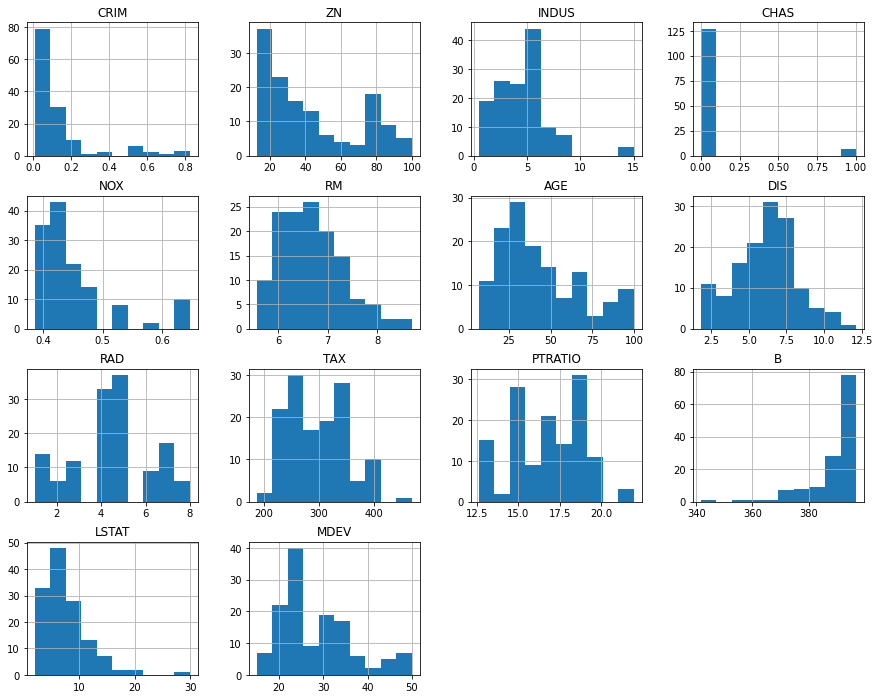

In [12]:
print_histograms(dataset)

In [13]:
def compute_correlations_matrix(boston_dataframe):
    return boston_dataframe.corr()  # person is the default method

In [14]:
correlations = compute_correlations_matrix(dataset)

In [15]:
correlations["MDEV"]

CRIM       0.219338
ZN         0.208413
INDUS     -0.346514
CHAS       0.211686
NOX        0.222371
RM         0.925841
AGE       -0.033786
DIS       -0.393041
RAD       -0.083381
TAX       -0.308583
PTRATIO   -0.489165
B          0.067230
LSTAT     -0.581478
MDEV       1.000000
Name: MDEV, dtype: float64

In [16]:
# correlation coef.. between median value and number of rooms
correlations["MDEV"]["RM"]

0.9258413291990397

In [17]:
m = np.argmax(-correlations["MDEV"])
print("Greatest negative correlation with MDEV:")
print(correlations.index[m], ": ", correlations["MDEV"][m])

Greatest negative correlation with MDEV:
LSTAT :  -0.5814784696504928


In [18]:
def print_scatter_matrix(boston_dataframe):
    scatter_matrix(boston_dataframe, figsize=(12, 12), marker=".")
    # plt.tight_layout()
    plt.show()

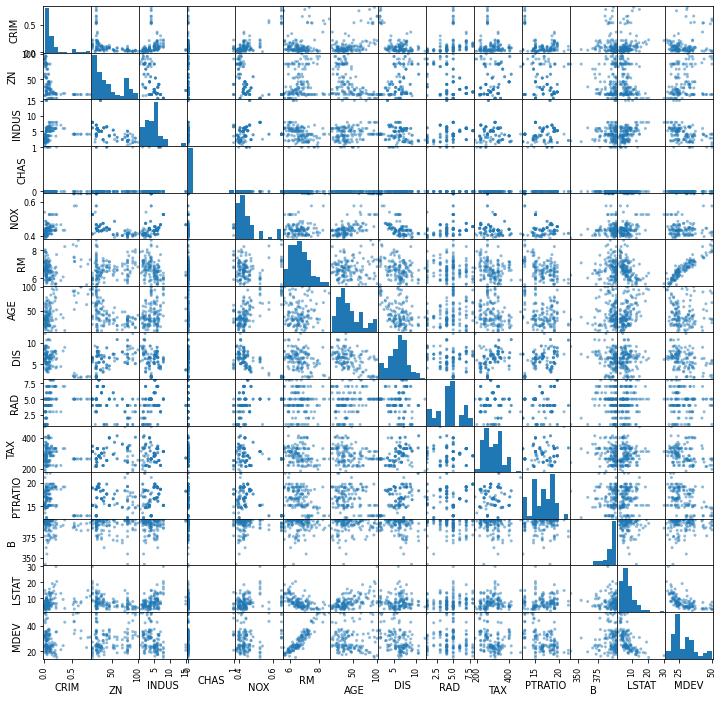

In [19]:
print_scatter_matrix(dataset)

## MDEV vs RM

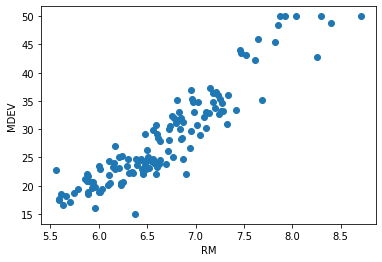

In [20]:
plt.plot(dataset["RM"], dataset["MDEV"], "o")
plt.xlabel("RM")
plt.ylabel("MDEV")
plt.show()

## MDEV vs LSTAT, AGE, CRIME

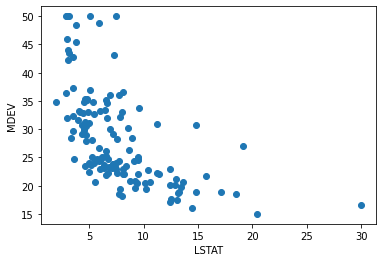

In [21]:
plt.plot(dataset["LSTAT"], dataset["MDEV"], "o")
plt.xlabel("LSTAT")
plt.ylabel("MDEV")
plt.show()

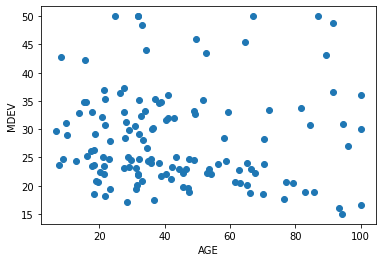

In [22]:
plt.plot(dataset["AGE"], dataset["MDEV"], "o")
plt.xlabel("AGE")
plt.ylabel("MDEV")
plt.show()

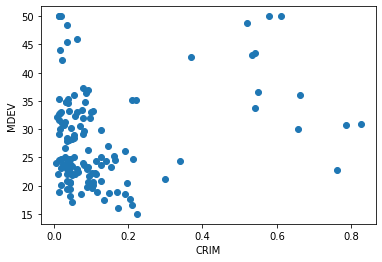

In [23]:
plt.plot(dataset["CRIM"], dataset["MDEV"], "o")
plt.xlabel("CRIM")
plt.ylabel("MDEV")
plt.show()

## LSTAT correlations

In [24]:
correlations["LSTAT"]

CRIM       0.204846
ZN        -0.418679
INDUS      0.392836
CHAS      -0.110509
NOX        0.260939
RM        -0.559490
AGE        0.557656
DIS       -0.005904
RAD        0.162036
TAX        0.085961
PTRATIO    0.042958
B         -0.073279
LSTAT      1.000000
MDEV      -0.581478
Name: LSTAT, dtype: float64

In [25]:
print("Top LSTAT correlations")
lstat_correlations = correlations["LSTAT"].sort_values()
print("\nMost negative:")
print(lstat_correlations[0:3])
print("\nMost positive:")
print(
    lstat_correlations[-4:-1].sort_values(ascending=False)
)  # -1 to account for LSTAT value itself

Top LSTAT correlations

Most negative:
MDEV   -0.581478
RM     -0.559490
ZN     -0.418679
Name: LSTAT, dtype: float64

Most positive:
AGE      0.557656
INDUS    0.392836
NOX      0.260939
Name: LSTAT, dtype: float64


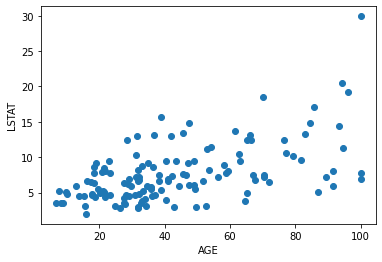

In [26]:
plt.plot(dataset["AGE"], dataset["LSTAT"], "o")
plt.xlabel("AGE")
plt.ylabel("LSTAT")
plt.show()

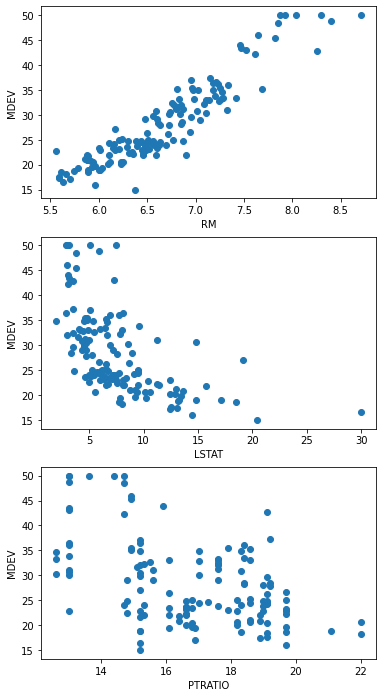

In [27]:
fig, axs = plt.subplots(3, figsize=(6, 12))
i = 0
for index in (correlations["MDEV"] ** 2).sort_values(ascending=False)[1:].index[:3]:
    axs[i].plot(dataset[index], dataset["MDEV"], "o")
    axs[i].set_xlabel(index)
    axs[i].set_ylabel("MDEV")
    i += 1
plt.show()

# Prediction

## Fitting a model

In [28]:
def boston_fit_model(boston_dataframe):
    # SELECT two columns from our
    model_dataset = boston_dataframe[["RM", "MDEV"]]
    regressor = LinearRegression()
    # Extract column 1
    x = model_dataset.iloc[:, :-1].values
    # Extract column 2
    y = model_dataset.iloc[:, 1].values
    # Train the model
    regressor.fit(x, y)
    return regressor

In [29]:
def boston_predict(estimator, array_to_predict):
    return estimator.predict(array_to_predict)

In [30]:
data = dataset[["RM", "MDEV"]].iloc[:, :-1].values
base_test = dataset[["RM", "MDEV"]].iloc[:, 1].values
estimator = boston_fit_model(dataset)
prediction = boston_predict(estimator, data)
print(prediction)

[27.17190068 20.36457149 22.29915883 15.7578354  20.26784212 24.77784885
 20.32829798 18.87735748 27.41372409 32.60083639 19.77210412 21.60996209
 26.39806574 20.1952951  18.8652663  35.32134983 24.85039587 30.08587285
 21.97269721 19.33682197 17.08786419 19.80837763 25.73305135 29.43294963
 33.56813006 23.72591699 17.64405805 18.7443546  15.31046208 18.82899279
 29.00975865 27.70391219 23.87101104 22.23870297 25.56377495 22.77071449
 23.23017898 29.67477304 26.94216843 34.54751489 31.71818092 29.1548527
 34.4628767  29.89241412 27.52254463 42.89042278 35.78081432 33.60440357
 35.6236291  32.00836902 33.94295635 22.17824712 39.6862625  42.62441702
 44.81291894 26.03533062 27.54672697 31.06525769 21.36813867 24.5481166
 24.97130758 15.2983709  15.44346495 21.52532389 22.95208205 25.45495442
 28.90093811 26.10787764 25.51541027 31.79072794 47.53343239 21.52532389
 18.72017225 37.80003985 52.91400341 36.33700818 30.40024329 34.76515597
 38.59805713 49.21410513 36.26446115 34.80142948 14.8

## Evaluating the model

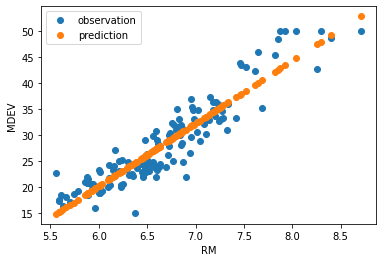

In [31]:
plt.plot(dataset["RM"], dataset["MDEV"], "o", label="observation")
plt.plot(data, prediction, "o", label="prediction")
plt.xlabel("RM")
plt.ylabel("MDEV")
plt.legend()
plt.show()

In [32]:
def print_model_prediction_evaluator(base_test, prediction):
    print("Mean Absolute Error:", metrics.mean_absolute_error(base_test, prediction))
    print("Mean Squared Error:", metrics.mean_squared_error(base_test, prediction))
    print(
        "Root Mean Squared Error:",
        np.sqrt(metrics.mean_squared_error(base_test, prediction)),
    )

In [33]:
print_model_prediction_evaluator(base_test, prediction)

Mean Absolute Error: 2.552524552256376
Mean Squared Error: 10.013528487460897
Root Mean Squared Error: 3.1644159788910335
